In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import numpy as np

In [188]:
 %matplotlib inline

In [189]:
# Load all the datasets
care_management = r'C:\Users\parob\dthon\2022_datathon_team_2\data\care_management_anonymized.csv'
volunteer_services = r"C:\Users\parob\dthon\2022_datathon_team_2\data\volunteer_services_anonymized.csv"
client_info = r"C:\Users\parob\dthon\2022_datathon_team_2\data\client_info_anonymized.csv"
donations = r"C:\Users\parob\dthon\2022_datathon_team_2\data\donations_anonymized.csv"
pantry = r"C:\Users\parob\dthon\2022_datathon_team_2\data\pantry_anonymized.csv"

In [190]:
vol = pd.read_csv(volunteer_services)

In [191]:
client = pd.read_csv(client_info)

In [192]:
pan = pd.read_csv(pantry)

In [193]:
vol.head()

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
0,276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt
1,276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt
2,276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt
3,276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt
4,276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt


In [194]:
# Basic data checks
vol.dtypes

anon_ID                    int64
rider_first_ride_date     object
rider_last_ride_date      object
rider_num_rides            int64
appt_date                 object
appt_duration            float64
category                  object
dtype: object

In [195]:
vol.shape

(4925, 7)

In [196]:
vol.columns

Index(['anon_ID', 'rider_first_ride_date', 'rider_last_ride_date',
       'rider_num_rides', 'appt_date', 'appt_duration', 'category'],
      dtype='object')

In [197]:
vol['anon_ID'].nunique()
## There are 162 unique clients which have leveraged the rider services between Jan 2019 and Sept 2021

162

In [198]:
# Top 10 clients which which have used rider services
vol.groupby(['anon_ID'])['appt_duration'].sum().sort_values(ascending=False).head(10)

anon_ID
602    2648.0
166    1157.0
469     677.5
638     565.5
382     460.0
377     329.0
143     296.5
582     284.5
81      279.0
38      267.5
Name: appt_duration, dtype: float64

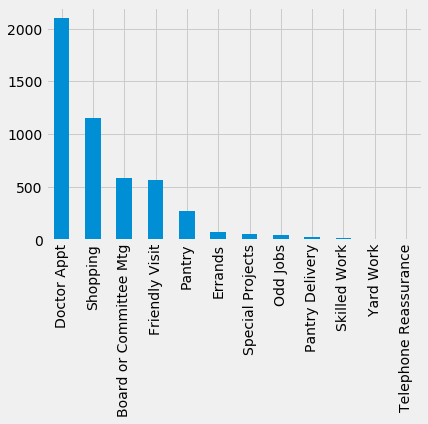

In [264]:
vol['category'].value_counts().plot(kind = 'bar')
# Number of rides per category

In [200]:
# Between between January 2019 and September 2021 hours of rider services used by category
vol_per_cat = vol.groupby(['category'])['appt_duration'].sum().sort_values(ascending=False)
vol_per_cat

category
Doctor Appt               4366.75
Shopping                  3376.75
Pantry                    2478.50
Friendly Visit            2086.25
Board or Committee Mtg    1353.00
Special Projects           793.50
Skilled Work               568.50
Odd Jobs                   200.50
Pantry Delivery            156.50
Errands                    147.25
Yard Work                   59.50
Telephone Reassurance        2.00
Name: appt_duration, dtype: float64

In [201]:
type(vol_per_cat)

pandas.core.series.Series

Text(0, 0.5, 'Total Hours Volunteered')

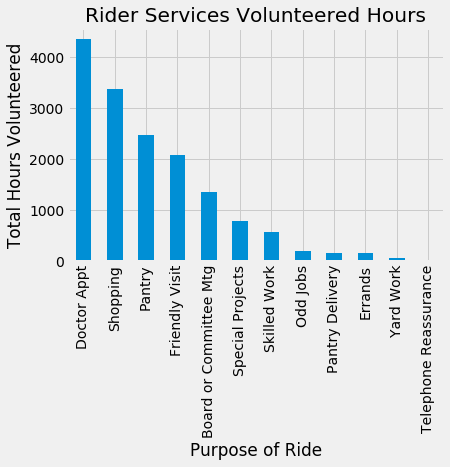

In [202]:
plt.style.use('fivethirtyeight')
vol_per_cat.plot(kind='bar')
plt.title("Rider Services Volunteered Hours")
plt.xlabel("Purpose of Ride")
plt.ylabel("Total Hours Volunteered")

# ## Eldernet focus area - adding trips to non-essential appointments that improve quality of life (i.e. hairdresser, mall, religious services); 
# mobile behavioral health treatment; medication management


In [203]:
# No missing data- good clean dataset
vol.isna().sum()

anon_ID                  0
rider_first_ride_date    0
rider_last_ride_date     0
rider_num_rides          0
appt_date                0
appt_duration            0
category                 0
dtype: int64

In [204]:
# converting dates to date format
vol.dtypes

anon_ID                    int64
rider_first_ride_date     object
rider_last_ride_date      object
rider_num_rides            int64
appt_date                 object
appt_duration            float64
category                  object
dtype: object

In [205]:
vol["rider_first_ride_date"]= pd.to_datetime(vol["rider_first_ride_date"])
vol["rider_last_ride_date"]= pd.to_datetime(vol["rider_last_ride_date"])
vol["appt_date"]= pd.to_datetime(vol["appt_date"])

In [206]:
vol.head()

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
0,276,2015-04-27,2021-11-16,0,2021-09-15,2.00,Doctor Appt
1,276,2015-04-27,2021-11-16,0,2021-09-01,2.00,Doctor Appt
2,276,2015-04-27,2021-11-16,0,2021-08-26,2.00,Doctor Appt
3,276,2015-04-27,2021-11-16,0,2021-08-11,2.00,Doctor Appt
4,276,2015-04-27,2021-11-16,0,2021-08-10,2.25,Doctor Appt


In [207]:
vol.dtypes

anon_ID                           int64
rider_first_ride_date    datetime64[ns]
rider_last_ride_date     datetime64[ns]
rider_num_rides                   int64
appt_date                datetime64[ns]
appt_duration                   float64
category                         object
dtype: object

In [208]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import numpy as np

In [209]:
vol['rider_services_len']= vol['rider_last_ride_date']-vol['rider_first_ride_date']
vol['rider_services_len'] = round(vol['rider_services_len']/np.timedelta64(1,'Y'))

In [210]:
vol.head()

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,rider_services_len
0,276,2015-04-27,2021-11-16,0,2021-09-15,2.00,Doctor Appt,7.0
1,276,2015-04-27,2021-11-16,0,2021-09-01,2.00,Doctor Appt,7.0
2,276,2015-04-27,2021-11-16,0,2021-08-26,2.00,Doctor Appt,7.0
3,276,2015-04-27,2021-11-16,0,2021-08-11,2.00,Doctor Appt,7.0
4,276,2015-04-27,2021-11-16,0,2021-08-10,2.25,Doctor Appt,7.0


In [211]:
vol.dtypes

anon_ID                           int64
rider_first_ride_date    datetime64[ns]
rider_last_ride_date     datetime64[ns]
rider_num_rides                   int64
appt_date                datetime64[ns]
appt_duration                   float64
category                         object
rider_services_len              float64
dtype: object

In [265]:
vol['anon_ID'].groupby(vol['rider_services_len']).count().sort_values()

rider_services_len
0.0     104
2.0     289
1.0     330
4.0     392
3.0     498
7.0     560
5.0     650
6.0    2102
Name: anon_ID, dtype: int64

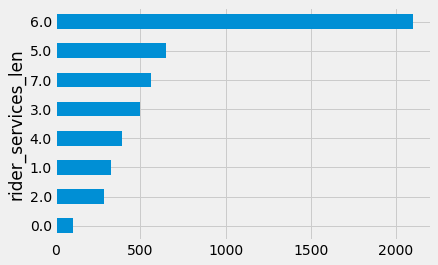

In [212]:
plt.style.use('fivethirtyeight')
vol['anon_ID'].groupby(vol['rider_services_len']).count().sort_values().plot(kind='barh')
## Each anon_id here respresents the time when a client has leveraged the ElderNet rider services. We see that the
## count of rides is highest for clients where the length of engagement is higher than 5 years. The count is lower
## which makes sense here because of COVID most likely. However, perhaps there is a need to promote rider services so 
## more people can leverage the services.

In [213]:
vol.describe().T

,count,mean,std,min,25%,50%,75%,max
anon_ID,4925.0,329.857462,187.983010,2.0,166.0,297.0,505.0,641.0
rider_num_rides,4925.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
appt_duration,4925.0,3.165279,5.648763,0.0,2.0,2.0,3.0,200.0
rider_services_len,4925.0,4.822741,1.860938,0.0,4.0,6.0,6.0,7.0


In [214]:
print(client['anon_ID'].nunique())
print()
print(vol['anon_ID'].nunique())

641

162


In [215]:
162/641*100
## Approximately only 25% of the clients are taking advantage of the rider services

25.273010920436818

In [216]:
rider_analysis = client.merge(vol,how='inner')

In [217]:
client.shape

(641, 5)

In [218]:
vol.shape

(4925, 8)

In [219]:
rider_analysis.shape

(4925, 12)

In [220]:
rider_analysis.head()

,anon_ID,county,poverty,minority,age_group,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,rider_services_len
0,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-05-11,2.0,Doctor Appt,6.0
1,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-05-03,2.0,Doctor Appt,6.0
2,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-22,2.0,Doctor Appt,6.0
3,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-21,2.0,Doctor Appt,6.0
4,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-19,2.0,Doctor Appt,6.0


In [221]:
# Removing missing data
rider_analysis = rider_analysis.dropna()

In [222]:
rider_analysis.shape

(3152, 12)

In [223]:
rider_analysis.head()

,anon_ID,county,poverty,minority,age_group,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,rider_services_len
0,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-05-11,2.0,Doctor Appt,6.0
1,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-05-03,2.0,Doctor Appt,6.0
2,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-22,2.0,Doctor Appt,6.0
3,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-21,2.0,Doctor Appt,6.0
4,2,Montgomery,No,No,D,2015-11-10,2021-05-11,0,2021-04-19,2.0,Doctor Appt,6.0


In [224]:
rider_analysis= rider_analysis.drop(['county'], axis=1)

In [225]:
rider_analysis

,anon_ID,poverty,minority,age_group,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,rider_services_len
0,2,No,No,D,2015-11-10,2021-05-11,0,2021-05-11,2.0,Doctor Appt,6.0
1,2,No,No,D,2015-11-10,2021-05-11,0,2021-05-03,2.0,Doctor Appt,6.0
2,2,No,No,D,2015-11-10,2021-05-11,0,2021-04-22,2.0,Doctor Appt,6.0
3,2,No,No,D,2015-11-10,2021-05-11,0,2021-04-21,2.0,Doctor Appt,6.0
4,2,No,No,D,2015-11-10,2021-05-11,0,2021-04-19,2.0,Doctor Appt,6.0
...,...,...,...,...,...,...,...,...,...,...,...
3457,641,Yes,No,T,2017-09-03,2021-07-30,0,2019-05-13,3.0,Shopping,4.0
3458,641,Yes,No,T,2017-09-03,2021-07-30,0,2019-04-20,3.0,Shopping,4.0
3459,641,Yes,No,T,2017-09-03,2021-07-30,0,2019-03-15,2.0,Shopping,4.0
3460,641,Yes,No,T,2017-09-03,2021-07-30,0,2019-02-09,2.0,Shopping,4.0


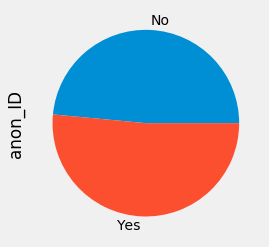

In [226]:
## Looking for demographic patterns from people who participate in rider services
rider_analysis['anon_ID'].groupby(rider_analysis['poverty']).count().plot(kind='pie')

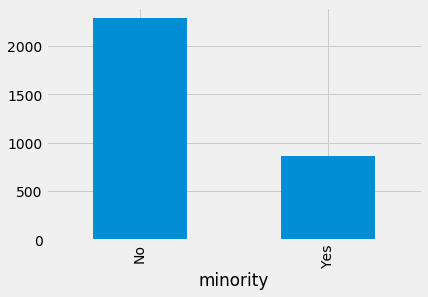

In [227]:
rider_analysis['anon_ID'].groupby(rider_analysis['minority']).count().plot(kind='bar')

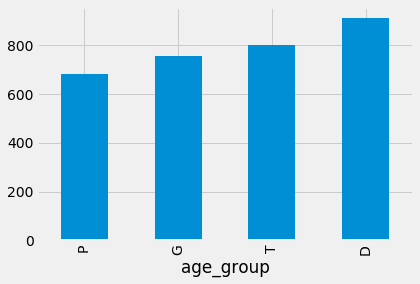

In [228]:
rider_analysis['anon_ID'].groupby(rider_analysis['age_group']).count().sort_values().plot(kind='bar')
## Age groups T and D leverage rider services the most, maybe during intake the rider services can be offered based
## on if a canidate falls into this age category

In [229]:
pan.head()

,anon_ID,assistance_date,assistance_category,amount,unit
0,102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
1,178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
2,588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
3,502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
4,232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds


In [230]:
pan.shape

(6273, 5)

In [231]:
pan.dtypes

anon_ID                 int64
assistance_date        object
assistance_category    object
amount                  int64
unit                   object
dtype: object

In [232]:
pan["assistance_date"]= pd.to_datetime(pan["assistance_date"])

In [233]:
pan.dtypes

anon_ID                         int64
assistance_date        datetime64[ns]
assistance_category            object
amount                          int64
unit                           object
dtype: object

In [234]:
pan.isna().sum()

anon_ID                0
assistance_date        0
assistance_category    0
amount                 0
unit                   0
dtype: int64

In [235]:
pan['assistance_category'].value_counts()

Food Pantry: Food Pantry Poundage    5817
Food Pantry: Holiday Baskets          437
Food Pantry: Easter Outreach           19
Name: assistance_category, dtype: int64

In [236]:
pan['unit'].value_counts()

Pounds        6161
Dollars         99
Boxes/Bags      13
Name: unit, dtype: int64

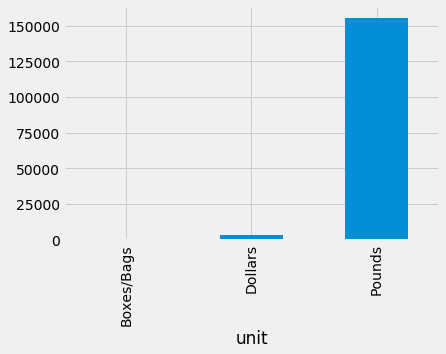

In [237]:
pan['amount'].groupby(pan['unit']).sum().sort_values().plot(kind='bar')

In [238]:
pan['amount'].groupby(pan['unit']).sum()

unit
Boxes/Bags        49
Dollars         3045
Pounds        155605
Name: amount, dtype: int64

In [239]:
pan['amount'].groupby(pan["assistance_date"]).sum().sort_values(ascending = False).head(10)

assistance_date
2020-03-16 13:35:00    325
2020-03-16 13:40:00    300
2020-03-16 13:20:00    300
2020-05-26 14:00:00    275
2020-11-20 12:00:00    275
2020-12-22 00:30:00    260
2020-03-16 13:25:00    250
2019-11-15 16:00:00    240
2020-12-19 11:00:00    240
2020-10-27 11:00:00    225
Name: amount, dtype: int64

In [240]:
pan_new = pan.copy()

In [241]:
pan_new = pan_new[pan_new['unit']=='Pounds']
## focusing on food/pounds the most

In [242]:
pan_new['unit'].value_counts()

Pounds    6161
Name: unit, dtype: int64

In [243]:
pan_ts = pan_new[['amount',"assistance_date"]]

In [244]:
pan_ts.head()

,amount,assistance_date
0,25,2019-01-03 10:00:00
1,25,2019-01-03 10:00:00
2,25,2019-01-03 10:30:00
3,25,2019-01-03 11:15:00
4,25,2019-01-03 11:30:00


In [245]:
pan_ts['assistance_date']= pd.to_datetime(pan_ts['assistance_date'],format='%Y')
pan_ts = pan_ts.set_index('assistance_date')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
pan_ts

,amount
assistance_date,
2019-01-03 10:00:00,25
2019-01-03 10:00:00,25
2019-01-03 10:30:00,25
2019-01-03 11:15:00,25
2019-01-03 11:30:00,25
...,...
2021-09-07 14:15:00,25
2021-09-07 14:55:00,25
2021-09-07 15:00:00,25


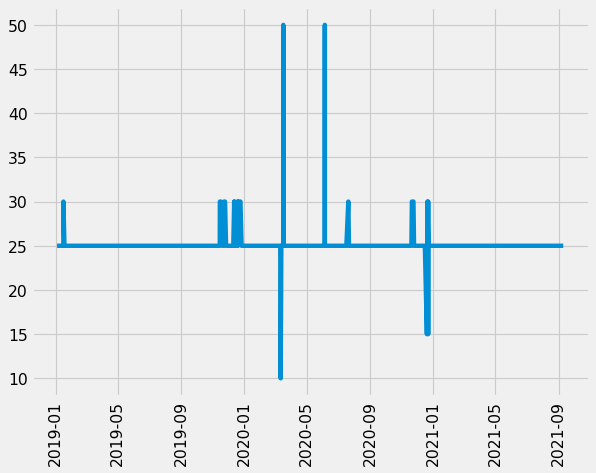

In [247]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(pan_ts['amount'])
plt.xticks( rotation='vertical')
plt.show()

In [248]:
pan_ts.describe()

,amount
count,6161.000000
mean,25.256452
std,1.357089
min,10.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,50.000000


In [249]:
pan_client = pan_new.merge(client, how ='inner')

In [250]:
pan_client.head()

,anon_ID,assistance_date,assistance_category,amount,unit,county,poverty,minority,age_group
0,102,2019-01-03 10:00:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,Yes,NaN,G
1,102,2019-01-07 12:10:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,Yes,NaN,G
2,102,2019-01-29 12:10:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,Yes,NaN,G
3,102,2019-02-14 12:10:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,Yes,NaN,G
4,102,2019-02-28 12:10:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,Yes,NaN,G


In [251]:
pan_client = pan_client.dropna()

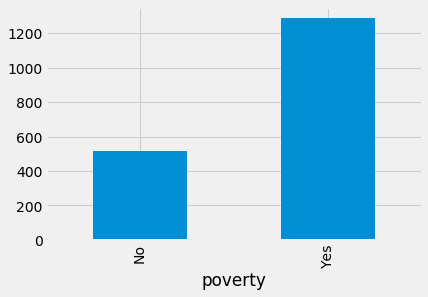

In [252]:
pan_client['anon_ID'].groupby(pan_client['poverty']).count().sort_values().plot(kind='bar')

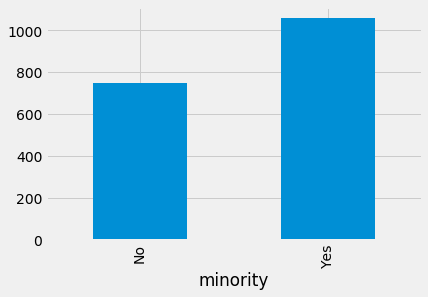

In [253]:
pan_client['anon_ID'].groupby(pan_client['minority']).count().sort_values().plot(kind='bar')
## repeating anon_id, not sure if this is accurate because of that

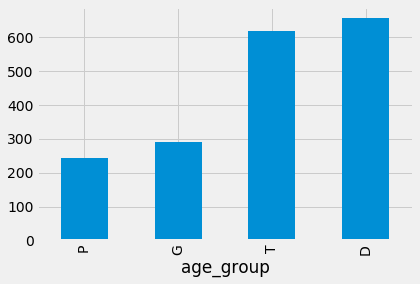

In [254]:
pan_client['anon_ID'].groupby(pan_client['age_group']).count().sort_values().plot(kind='bar')

In [255]:
## Pantry services are most availed by minorities and poorer communities. As Eldernet expands their geographic footprint
## this information can be utilized to target services accordingly.

In [256]:
pan_client['amount'].groupby(pan_client['anon_ID']).sum().sort_values(ascending=False).head(20)

anon_ID
625    2410
607    2230
15     2120
33     1930
361    1660
588    1590
308    1540
72     1460
436    1435
516    1340
502    1330
475    1310
529    1305
210    1260
314    1235
382    1235
609    1155
561    1155
505    1155
222    1075
Name: amount, dtype: int64

In [257]:
filt = pan_client['anon_ID']==15

In [258]:
pan_client_highest = pan_client[filt]
pan_client_highest

,anon_ID,assistance_date,assistance_category,amount,unit,county,poverty,minority,age_group
2525,15,2019-01-15 16:00:00,Food Pantry: Holiday Baskets,30,Pounds,Montgomery,No,No,D
2526,15,2019-01-15 16:00:00,Food Pantry: Holiday Baskets,30,Pounds,Montgomery,No,No,D
2527,15,2019-08-27 14:11:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
2528,15,2019-08-27 14:11:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
2529,15,2019-09-10 14:26:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
...,...,...,...,...,...,...,...,...,...
2604,15,2021-06-15 11:00:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
2605,15,2021-07-13 10:35:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
2606,15,2021-07-13 10:35:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D
2607,15,2021-08-10 10:29:00,Food Pantry: Food Pantry Poundage,25,Pounds,Montgomery,No,No,D


In [259]:
pan['anon_ID'].nunique()

414

In [260]:
client['anon_ID'].nunique()

641

In [261]:
round(414/641*100)
## 65% of folks use pantry services

65

In [262]:
vol['category'].value_counts()

Doctor Appt               2102
Shopping                  1158
Board or Committee Mtg     586
Friendly Visit             571
Pantry                     273
Errands                     79
Special Projects            56
Odd Jobs                    43
Pantry Delivery             30
Skilled Work                20
Yard Work                    4
Telephone Reassurance        3
Name: category, dtype: int64

In [ ]:
vol_new = vol[(vol['category']=='Pantry')|(vol['category']=='Pantry Delivery')]

In [ ]:
vol.shape

In [ ]:
vol_new.shape

In [ ]:
vol_new.head()

In [ ]:
pan_client.head()

In [ ]:
## merge vol_new and pan_client to see if any patterns emerge
vol_pan_rel = vol_new.merge(pan_client, how ='inner')

In [ ]:
vol_pan_rel.head()

In [ ]:
vol_pan_rel['anon_ID'].nunique()
## Just 1 client used the rider services to access the pantry
## anon_ID 602 is in the volunteer services dataset with pantry as category for the ride, but not in the pantry dataset
## which is strange